In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanacse","key":"dd8258ac3cfced50e9860b05c4d73757"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset
!unzip corn-or-maize-leaf-disease-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
License(s): copyright-authors
 63% 101M/161M [00:00<00:00, 1.05GB/s]
100% 161M/161M [00:00<00:00, 770MB/s] 
Archive:  corn-or-maize-leaf-disease-dataset.zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  infla

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
     '/content/data',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

Found 3352 images belonging to 4 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
     '/content/data',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation',
)

Found 836 images belonging to 4 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(4,activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_indices = train_generator.class_indices
class_name = list(class_indices.keys())
print(class_indices)
print(class_name)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_generator,epochs = 10, validation_data = val_generator, batch_size = BATCH_SIZE,)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.6056 - loss: 1.0951 - val_accuracy: 0.8421 - val_loss: 0.3784
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.8410 - loss: 0.3844 - val_accuracy: 0.7907 - val_loss: 0.5109
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.8545 - loss: 0.3695 - val_accuracy: 0.8720 - val_loss: 0.3262
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.8910 - loss: 0.2863 - val_accuracy: 0.8565 - val_loss: 0.3018
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.8949 - loss: 0.2694 - val_accuracy: 0.8780 - val_loss: 0.3438
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9343 - loss: 0.1951 - val_accuracy: 0.8840 - val_loss: 0.2837
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.9437 - loss: 0.1571 - val_accuracy: 0.8876 - val_loss: 0.3217
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.9528 - loss: 0

In [ ]:
model.save('/content/data/leaf.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/data/leaf.h5')
print('model loaded')

model loaded


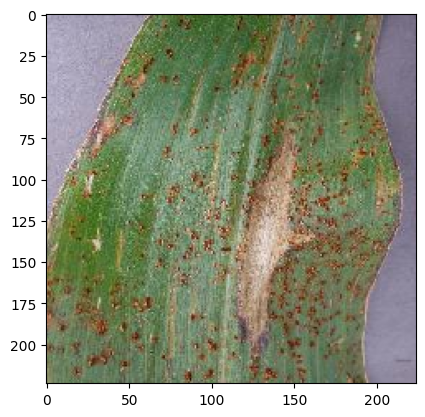

In [17]:
test_image_path = "/content/blight.png"
img = image.load_img(test_image_path,target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [18]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis = 0)
img_array /= 255.
prediction = model.predict(img_array)
print(prediction)
nd = np.argmax(prediction[0])
print(class_name[nd])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.9773824e-01 2.7323468e-04 1.9885737e-03 4.1376729e-22]]
Blight
